In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Uncomment and complete the following code to generate synthetic sine wave data with added noise
def generate_data(num_points, noise_std=0.1):
    # Generate random x values
    x_values = np.sort(np.random.uniform(0, 2 * np.pi, num_points))
    # Generate corresponding y values for sine curve with added noise
    y_values = np.sin(x_values) + np.random.normal(0, noise_std, num_points)
    return x_values, y_values

num_points = 1000

# You can adjust the noise level as needed
x_train, y_train = generate_data(num_points, noise_std=0.1)

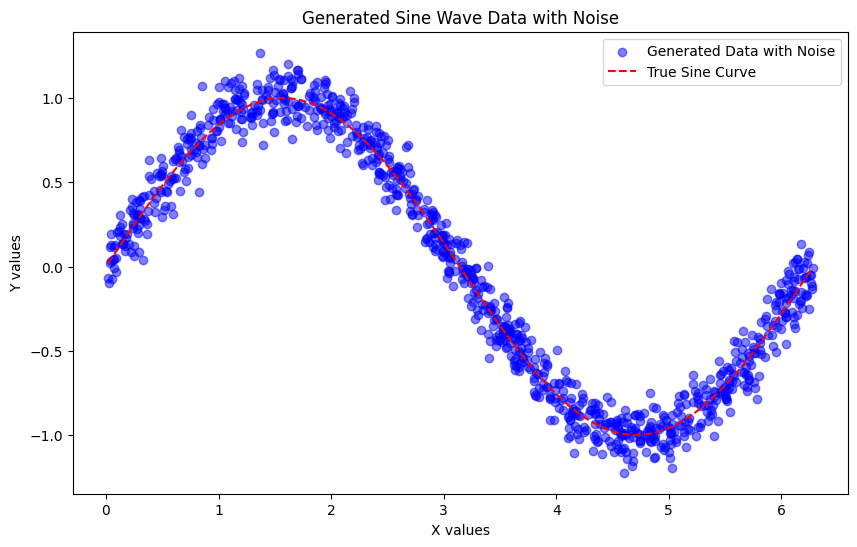

In [3]:
# Plot the generated data
plt.figure(figsize=(10, 6))

plt.scatter(
    x_train, y_train,
    label='Generated Data with Noise', color='blue', alpha=0.5)
plt.plot(
    x_train, np.sin(x_train),
    label='True Sine Curve', color='red', linestyle='--')

plt.legend()
plt.title('Generated Sine Wave Data with Noise')
plt.xlabel('X values')
plt.ylabel('Y values')
plt.show()

In [4]:
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(1, 10)  # 1 input feature, 10 hidden units
        self.activation = nn.SiLU()
        self.fc2 = nn.Linear(10, 1)  # 10 hidden units, 1 output

    def forward(self, x):
        x = self.fc1(x)
        x = self.activation(x)
        x = self.fc2(x)
        return x

In [5]:
def get_optimizer(optimizer_name, model):
  if optimizer_name == "ADAM":
      return optim.Adam(model.parameters())
  elif optimizer_name == "LBFGS":
      return optim.LBFGS(model.parameters())
  raise ValueError('Chosen optimizer is unavailable.')


def train(model, optimizer, criterion, inputs, targets):
    def closure():
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        return loss

    optimizer.step(closure)
    return closure().item()


def evaluate(model, x_test):
    model.eval()
    with torch.no_grad():
        y_pred = model(x_test.view(-1, 1)).numpy()
    return y_pred

In [6]:
model = SimpleNN()
criterion = nn.MSELoss()
optimizer = get_optimizer('ADAM', model)

num_epochs = 10000
for epoch in range(num_epochs):
    # Convert data to PyTorch tensors
    inputs = torch.tensor(
        x_train, dtype=torch.float32, requires_grad=True).view(-1, 1)
    targets = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)

    # Training
    loss = train(model, optimizer, criterion, inputs, targets)

    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss:.4f}')

Epoch [100/10000], Loss: 0.3561
Epoch [200/10000], Loss: 0.2256
Epoch [300/10000], Loss: 0.1954
Epoch [400/10000], Loss: 0.1832
Epoch [500/10000], Loss: 0.1767
Epoch [600/10000], Loss: 0.1704
Epoch [700/10000], Loss: 0.1629
Epoch [800/10000], Loss: 0.1540
Epoch [900/10000], Loss: 0.1441
Epoch [1000/10000], Loss: 0.1340
Epoch [1100/10000], Loss: 0.1245
Epoch [1200/10000], Loss: 0.1162
Epoch [1300/10000], Loss: 0.1092
Epoch [1400/10000], Loss: 0.1033
Epoch [1500/10000], Loss: 0.0980
Epoch [1600/10000], Loss: 0.0931
Epoch [1700/10000], Loss: 0.0882
Epoch [1800/10000], Loss: 0.0833
Epoch [1900/10000], Loss: 0.0785
Epoch [2000/10000], Loss: 0.0737
Epoch [2100/10000], Loss: 0.0688
Epoch [2200/10000], Loss: 0.0639
Epoch [2300/10000], Loss: 0.0589
Epoch [2400/10000], Loss: 0.0540
Epoch [2500/10000], Loss: 0.0492
Epoch [2600/10000], Loss: 0.0445
Epoch [2700/10000], Loss: 0.0401
Epoch [2800/10000], Loss: 0.0359
Epoch [2900/10000], Loss: 0.0321
Epoch [3000/10000], Loss: 0.0287
Epoch [3100/10000],

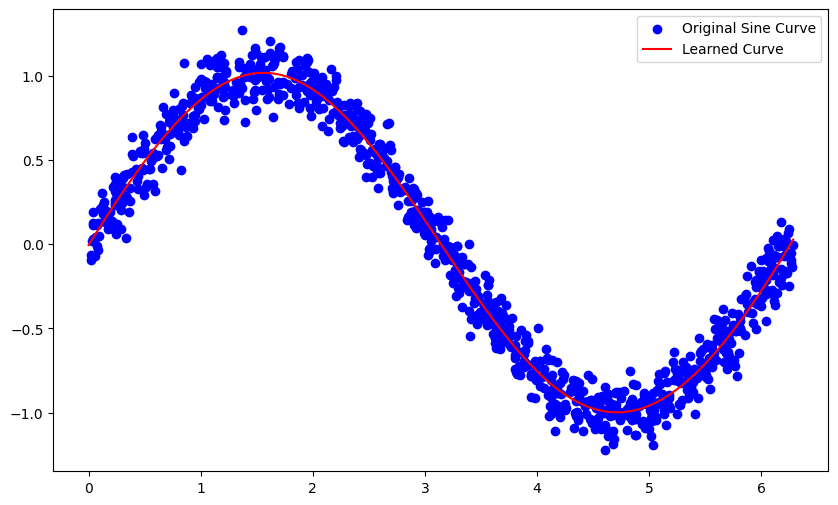

In [7]:
x_test = torch.linspace(0, 2*np.pi, 100)
y_pred = evaluate(model, x_test)

plt.figure(figsize=(10, 6))
plt.scatter(x_train, y_train, label='Original Sine Curve', color='blue')
plt.plot(x_test, y_pred, label='Learned Curve', color='red')

plt.legend()
plt.show()